In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

In [23]:
df = pd.read_pickle('data/tweet_data.p')

In [24]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [25]:
analyzer = SentimentIntensityAnalyzer()

In [26]:
def get_sentiment(sentence,lan):
    if lan=='en':
        vs = analyzer.polarity_scores(sentence)
        return vs['compound']
    else:
        return None

In [27]:
df['sentiment'] = df.apply(lambda row : get_sentiment(row['tweet_text'],row['language']),axis=1)

In [28]:
df

,tweet_id,tweet_text,hashtags,user,user_id,retweet_count,qouted_count,date,language,percentage_rt_found,percentage_qt_found,adjusted_RT,adjusted_QT,sentiment
1566831,1129638834570792960,"सपने देखना गलत नहीं, झूठे सपने दिखाना बुरी बात...","['LokSabhaElections2019', 'UttarPradesh', 'new...",mediaoverlook,994825734622449664,0,-1,Sat May 18 06:44:20 +0000 2019,hi,0.000000,-1.0,0,0,NaN
1241688,1124946827646660609,WhatsApp ने देश के अंदर मुहिम झेड रखी है अफवाह...,"['23_मई_भाजपा_गई', 'BJP_भगाओ_देश_बचाओ', 'LokSa...",BhushanAkhilesh,966340840280018945,0,-1,Sun May 05 07:59:58 +0000 2019,hi,0.000000,-1.0,0,0,NaN
9968688,1113821195659501569,@AnjaaN_5 @sankhwar_sudesh @JayeshJ74559601 @M...,[],SarojMi86385397,998176022162849792,3,-1,Thu Apr 04 15:10:41 +0000 2019,und,0.000000,-1.0,3,0,NaN
2558232,1109374826366554112,किसानों की आत्महत्या में निरंतर बढ़ोतरी हो रही...,['DeshKeMudde'],Sunil1989INC,2952261960,3,-1,Sat Mar 23 08:42:24 +0000 2019,hi,1.000000,-1.0,3,0,NaN
3285366,1116261107331674112,#NaMoForNewIndia\nThe country which was groupe...,['NaMoForNewIndia'],MPRajeshVerma,1014421526324699137,0,-1,Thu Apr 11 08:46:01 +0000 2019,en,0.000000,-1.0,0,0,0.7088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58569,1118706597792862209,"काम रुके ना, देश झुके ना। #VoteKar\n\nदूसरे चर...","['VoteKar', 'EveryVoteForModi']",1979Kishor,782593548,0,-1,Thu Apr 18 02:43:32 +0000 2019,hi,0.000000,-1.0,0,0,NaN
8631207,1122068888257224705,Teny moment between @RahulGandhi and @priyanka...,[],kabirgoswami,411423119,0,0,Sat Apr 27 09:24:04 +0000 2019,en,0.000000,0.0,0,0,0.0000
4539384,1104575184302792704,@drmonika_langeh @kamwali_bai @narendramodi जन...,[],b_randhe,1096484154584100864,6,-1,Sun Mar 10 02:50:20 +0000 2019,hi,0.000000,-1.0,6,0,NaN
1001734,1118890989374984194,தமிழக மக்களவை தேர்தலில் குறைந்தபட்சமாக மத்திய ...,"['Election2019', 'ElectionDay']",toptamilnews,823376817407008770,1,0,Thu Apr 18 14:56:14 +0000 2019,ta,1.000000,0.0,1,0,NaN


In [29]:
sentiment=df['sentiment'].to_list()

/home/hitkul/anaconda3/envs/PSOSM/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/hitkul/anaconda3/envs/PSOSM/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 166.,  248.,  279.,  264.,  144., 1358.,  374.,  587.,  498.,
         402.]),
 array([-0.9872 , -0.79028, -0.59336, -0.39644, -0.19952, -0.0026 ,
         0.19432,  0.39124,  0.58816,  0.78508,  0.982  ]),
 <a list of 10 Patch objects>)

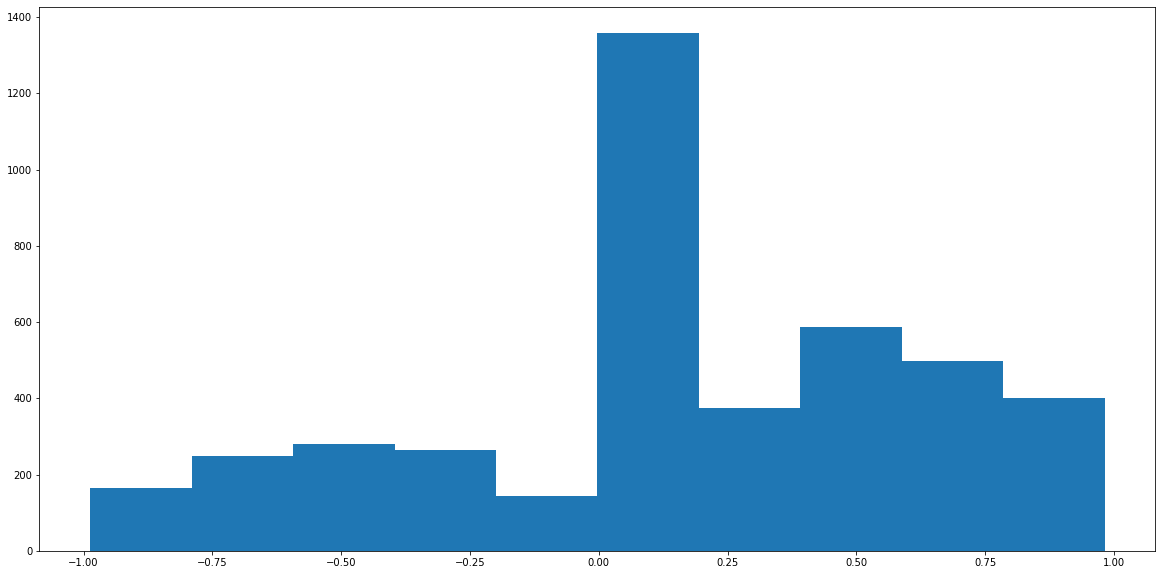

In [30]:
plt.hist(sentiment)

In [35]:
for i in df[df['sentiment']<-0.05]['tweet_text']:
    print(i)
    print("------------------------------")

.. and reject bigotry, fake nationalism to cover incompetence and corruption, lynchings, rioting ...
------------------------------
#ElectionResultsWithBTVI @amitmalviya To @szarabi: No anti-incumbency for @BJP4India In #MadhyaPradeshElections &amp; #ChattisgarhElections2018 

#Results2018 
#RajNiti 
#SemiFinal2019 https://t.co/cpzovchTht
------------------------------
'Large-scale desertion feared in AAP after May 23 results'  | #May23WithTimesNow | Click here: https://t.co/LgrD61ssOe https://t.co/poM1cRbC13
------------------------------
By deleting tweet, six years later @IndiaToday @aroonpurie @ncbn proved how scared they are of #May23 #JudgementDay #LokSabhaElections2019 
Slutyens will try to get perverse opinions abusing @ECISVEEP
@BJP4India when Congress bites the dust.
#RIPCongress https://t.co/pdT8JgEhHB
------------------------------
But will the customers get their own money back? Refunds of cancelled flights pending for more than 3 months!! #shameonyoujetairways 

Sote raho

In [36]:
for i in df[df['sentiment']>=0.05]['tweet_text']:
    print(i)
    print("------------------------------")

#NaMoForNewIndia
The country which was grouped under fragile five economies is now one of the fastest growing economies under Modi govt. In just 4 years, India jumped from 142nd rank to 77th rank in Ease of Doing Business report, giving rise to a New &amp; flourishing India!
------------------------------
#voteforbjp dear friends time has come to decide future of our country. Press Lotus button bring back Modi.
#PhirEkBarModiSarkar
------------------------------
"We are used to cleaning the outside house, but the most important house to clean is yourself - your own house - which we never do."
This is the back side condition of Palakkad Municipality Office.
@shafiksu #Palakkad #KeepCityClean #Elections2019 https://t.co/5g9M9EnE7u
------------------------------
COOL SHOES IN THE QUEUES. 
Send us a pic of the coolest shoes in your queue and five people will each win a R300 Plush voucher. Winners will be announced this Friday morning before 9am!!!! https://t.co/GgjRIRjdVT
-----------------

------------------------------
#Chowkidar gets the chor.

This is no surprise to the many who've seen the diligent functioning of #PMModi over decades to uphold the law

Cute of the illiberal intolerant pseudo intellectual cabal, losing credibility by the day, to assign a video journalist as reason for arrest! https://t.co/YVulr6ww9Z
------------------------------
When this person is so fond of fighting your rights from such a distance, you are staying in India anyway. Vote 4 Modi ji.
@narendramodi @TajinderBagga 
#IndiaBoleModiDobara https://t.co/AelrEvuliD
------------------------------
Now this is interesting. Not sure if it's really happening this way but this world is full of surprises. Whole of India was in surprise in 2004. 
https://t.co/MI2aHfMHyI
#Congress
------------------------------
I am proud to join #MainBhiChowkidar movement. As a citizen who loves India, I shall do my best to defeat corruption, dirt, poverty &amp; terrorism and help create a New India which is strong, 

In [38]:
for i in df[(df['sentiment']<0.05)&(df['sentiment']>-0.05)]['tweet_text']:
    print(i)
    print("------------------------------")

BREAKING: #NiravModiArrest @PMOIndia @dir_ed @pnbindia @SushmaSwaraj @RahulGandhi https://t.co/QDvpne2FS3
------------------------------
Expiry Date is near. This is a #Medical Term used for medicines. Don't fret. #WestBengal #Savethedoctors #saveDemocracy @MamataOfficial https://t.co/YYhAGvoajp
------------------------------
Amar sonar bangla , bought to you by @AITCofficial and @WBPolice , jay ho. #WestBengal #VotingRound6 #Phase6
------------------------------
DONE!
Added #Chowkidar to my name.
Being a soldier of Modiji, we all are Chowkidar.
#MainBhiChowkidar https://t.co/mKAgcprfj1
------------------------------
#ElectionsWithHT | Raising the bar for the youth, senior citizens across Mumbai city are turning up in large numbers at polling booths to vote. @MumbaiPolice can be seen assisting the elderly 

Follow LIVE updates: https://t.co/P7YQ4xwSQC

#Phase4
#VotingRound4 https://t.co/sZdrfYzgs2
------------------------------
#FileChorChowkidar
PM "Performed Bypass Surgery" In Rafale

#KejriwalKiKutai from verified news handle🤣🤣🤣🤣 https://t.co/X68MAe2cbh
------------------------------
#retweet this #followme read a bio for a #shoutout #Tattoo #ink #inked #tatted #instatattoo June 08, 2019 at 06:00PM
------------------------------
@la_gata_negra17 @KennRWeeks @LockeJohn76 @cjolds @Communist_Dog @VaTxn @MovieJay @thehipi @iunderstoodu @sandcrapper @cspanwj @TPPatriots @realDonaldTrump @POTUS @VP @PressSec @SenateDems @HouseDemocrats @SenSchumer @SenatorDurbin @SenKamalaHarris @CoryBooker @maziehirono @RepAdamSchiff @mkues65 @TheDemocrats @BillClinton @DNC @georgesoros @HillaryClinton @GavinNewsom @Alyssa_Milano @cspanMcArdle @fedmech @Torrid_Zone @BarackObama @Comey @JohnBrennan @SallyQYates @otreborrm @Sledge4show @JamesinSELA @Kybelle1957Liz @rpk409 @ACarpentersLife @MattGaudy @FBI @EricHolder such as
------------------------------
#BIGNEWS: Part 1: NEWS9 gets access of an alleged audio conversation between Dy CM @DrParameshwara's aide Darshan &amp; Congress worker.